# DS 440 Data Mining
# Lecture 8: Sklearn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Introduction

Scikit-learn is a machine learning library which is focused on modeling datasets. Some of the most popular groups of models provided by Sklearn are as follows −

1. **Supervised Learning algorithms** − Almost all the popular supervised learning algorithms, like Linear Regression, Support Vector Machine (SVM), Decision Tree etc., are the part of scikit-learn.

2. **Unsupervised Learning algorithms** − On the other hand, it also has all the popular unsupervised learning algorithms from clustering, factor analysis, PCA (Principal Component Analysis) to unsupervised neural networks.

3. **Clustering** − This model is used for grouping unlabeled data.

4. **Cross Validation** − It is used to check the accuracy of supervised models on unseen data.

5. **Dimensionality Reduction** − It is used for reducing the number of attributes in data which can be further used for summarisation, visualisation and feature selection.

6. **Ensemble methods** − As name suggest, it is used for combining the predictions of multiple supervised models.

7. **Feature extraction** − It is used to extract the features from data to define the attributes in image and text data.

8. **Feature selection** − It is used to identify useful attributes to create supervised models.

... and many more

# 2. Datasets in sklearn

## 2.1 Classification datasets

### iris

Looking at iris dataset which provides 4 features(X:independent variables) to predict a label(y:dependent variable)

In [2]:
from sklearn.datasets import load_iris

In [3]:
type(load_iris)

function

In [4]:
iris = load_iris()

In [5]:
type(iris)

sklearn.utils.Bunch

In [6]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
X = iris.data
y = iris.target
print(X.shape,y.shape)

(150, 4) (150,)


In [9]:
feature_names = iris.feature_names
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
target_names = iris.target_names
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [11]:
df = pd.DataFrame(X,columns = feature_names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [12]:
## including the labels as well
dat = np.concatenate((X,y.reshape(-1,1)),axis = 1)
names = ['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)',
  'target']
                     
df = pd.DataFrame(dat,columns = names)
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0     0.0  
1     0.0  
2     0.0  
3     0.0  
4     0.0

In [13]:
## Unique targets
set(y)

{0, 1, 2}

### MNIST

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()

In [15]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [16]:
X = digits.data
y = digits.target
print(X.shape,y.shape)

(1797, 64) (1797,)


In [17]:
## Plotting a random sample
def plot_digit(X,y):
    num = X.shape[0]
    ind = np.random.randint(0,num)
    plt.imshow(X[ind,:].reshape(8,8),cmap = 'gray')
    plt.title(f'Label: {y[ind]}')

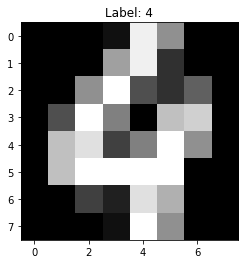

In [18]:
plot_digit(X,y)

### <mark style="background-color: #FFFF00">Exercise</mark>: Writing a function to plot all 8's in the dataset using subplot

## 2.2 Regression

### California housing

In [21]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [22]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [23]:
X = housing.data
y = housing.target
print(X.shape,y.shape)

(20640, 8) (20640,)


### <mark style="background-color: #FFFF00">Exercise</mark>: Display the first 5 rows of california dataset with median house value as the last column

You can find other datasets at: https://scikit-learn.org/stable/datasets/toy_dataset.html

## References

1. https://www.tutorialspoint.com/scikit_learn/index.htm